The Basic ML Workflow
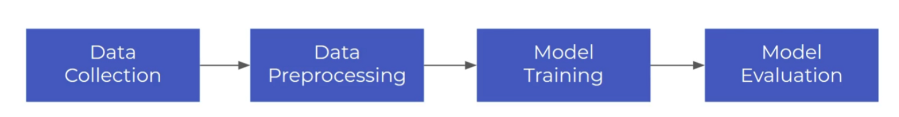

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
train_df = pd.read_csv("../dataset/train.csv") 
test_df = pd.read_csv("../dataset/test.csv")

In [4]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
test_df.head() 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
df1 = pd.concat([train_df, test_df], ignore_index = True )
df = df1.copy()

In [7]:
def get_unique_values(df , cols ): 
    for col in cols : 
        print("-"*100)
        print(f"The Unique Values for the Columns {col} are:")
        print(df[col].unique())
        print("-"*100)

In [8]:
get_unique_values(df, list(train_df.columns))

----------------------------------------------------------------------------------------------------
The Unique Values for the Columns ID are:
['0x1602' '0x1603' '0x1604' ... '0x25fef' '0x25ff0' '0x25ff1']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Customer_ID are:
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Month are:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
-------------------------------------------------------------------------------------------------

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Monthly_Balance are:
['312.49408867943663' '284.62916249607184' '331.2098628537912' ...
 '349.7263321025098' '463.23898098947717' '360.37968260123847']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Credit_Score are:
['Good' 'Standard' 'Poor' nan]
----------------------------------------------------------------------------------------------------


In [9]:
#Remove unwanted columns
# cols_to_drop = [
#     'ID',
#     'Customer_ID',
#     'Name',
#     'SSN'
# ]
# The Customer_ID is used to reassign the values so we shall remove after reasigning the values 
cols_to_drop = [
    'ID',
    'Name',
    'SSN'
]

- 'ID' and 'Customer_ID' columns may be redundant if each row of data represents a unique customer.
- 'Name' column may not be necessary for credit score classification, as it is not directly related to a customer's creditworthiness.
- 'SSN' column should be dropped due to privacy concerns and regulations. SSN is a sensitive and confidential information that should not be used in modeling, as it can be linked to personal identifiable information (PII) and increase the risk of identity theft. SSN is often linked to demographic information, such as race and ethnicity, which can lead to discrimination in the credit scoring process.

In [10]:
df.drop(columns = cols_to_drop, inplace = True)
df.shape

(150000, 25)

In [11]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [12]:
# Conversion of the hexadecimal string  (starting from the 5th character) to an integer.
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))
# Extracting the Months 
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month
df['Age'] = df.Age.astype(int)     
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [13]:
check_missing = train_df.isnull().sum() * 100 / train_df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Monthly_Inhand_Salary      15.002
Type_of_Loan               11.408
Name                        9.985
Credit_History_Age          9.030
Num_of_Delayed_Payment      7.002
Amount_invested_monthly     4.479
Num_Credit_Inquiries        1.965
Monthly_Balance             1.200
dtype: float64

In [14]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             139500 non-null  object
 1   Type_of_Loan           132888 non-null  object
 2   Credit_Mix             120000 non-null  object
 3   Credit_History_Age     136500 non-null  object
 4   Payment_of_Min_Amount  150000 non-null  object
 5   Payment_Behaviour      138600 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


In [15]:
def Reassign_Group_Object_NaN_Values(df, groupby, column, inplace=True):    
    '''
    IT checks if there are any None values in the column and replaces them with NaN values.
    Then, for each group in groupby, the function fills the missing values in column with the mode of the group.
    If inplace is True, the function modifies the input DataFrame df by assigning the filled column values to it; 
    otherwise, it returns the filled column values.
    '''
    import scipy.stats as stats
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
    
    # Run      
    if inplace:  
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
#         print(f'\nBefore Assigning NaN {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
#         print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
#         print(f'\nAfter Assigning NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
#         print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [16]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Occupation')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Credit_Mix')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Payment_Behaviour')

In [17]:
def duration_to_months(duration):
    if pd.isna(duration):
        return np.nan
    else:
        years, months = duration.split(' Years and ')
        months = months.strip(' Months')
        return int(years) * 12 + int(months)

In [18]:
# Handling Credit History Age 
df['Credit_History_Age'] = df['Credit_History_Age'].apply(duration_to_months)

In [19]:
df['Credit_History_Age']

0         265.0
1           NaN
2         267.0
3         268.0
4         269.0
          ...  
149995      NaN
149996    383.0
149997    384.0
149998    385.0
149999    386.0
Name: Credit_History_Age, Length: 150000, dtype: float64

In [21]:
# Reassign Wrong Values and Show Function
def Reassign_Group_Numeric_Wrong_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:   
#         print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
#         print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
#         print(f'\nBefore Assigning Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
#         print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
#         print(f'\nAfter Assigning  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
#         print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

In [22]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Age')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Annual_Income')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Inhand_Salary')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Bank_Accounts')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Card')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Interest_Rate')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Loan')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Delay_from_due_date')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Delayed_Payment')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Changed_Credit_Limit')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Inquiries')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Outstanding_Debt')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Total_EMI_per_month')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Amount_invested_monthly')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Balance')


In [23]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      6
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                    908
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour             804
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [24]:
df.dropna(inplace= True )

In [25]:
df.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79619 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               79619 non-null  int64  
 1   Month                     79619 non-null  int32  
 2   Age                       79619 non-null  float64
 3   Occupation                79619 non-null  object 
 4   Annual_Income             79619 non-null  float64
 5   Monthly_Inhand_Salary     79619 non-null  float64
 6   Num_Bank_Accounts         79619 non-null  float64
 7   Num_Credit_Card           79619 non-null  float64
 8   Interest_Rate             79619 non-null  float64
 9   Num_of_Loan               79619 non-null  float64
 10  Type_of_Loan              79619 non-null  object 
 11  Delay_from_due_date       79619 non-null  float64
 12  Num_of_Delayed_Payment    79619 non-null  float64
 13  Changed_Credit_Limit      79619 non-null  float64
 14  Num_Credit_

In [27]:
df.describe()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,7.961900e+04
mean,26025.996923,4.502292,32.939901,48953.724086,4069.451761,5.534282,5.645725,15.234479,3.989362,22.047413,13.706829,10.81986,6.118766,1514.059128,32.174245,212.679436,119.083244,647.099152,-3.767945e+22
std,14336.543018,2.291298,10.647156,37491.748027,3120.745560,2.584878,2.089220,8.884140,2.222575,15.218927,6.237571,6.75071,3.905402,1192.666337,5.075341,100.097244,128.467764,2088.433845,3.543805e+24
min,1006.000000,1.000000,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,1.000000,-1.000000,-2.000000,0.50000,0.000000,0.230000,20.100770,1.000000,4.462837,0.000000,-3.333333e+26
25%,13666.000000,3.000000,24.000000,18849.550000,1581.367500,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.65000,3.000000,606.780000,27.966736,133.000000,40.537440,69.001997,2.621132e+02
50%,25961.000000,5.000000,33.000000,36135.190000,3020.285000,6.000000,6.000000,15.000000,4.000000,19.000000,14.000000,9.68000,6.000000,1246.990000,32.194551,211.000000,76.604260,127.369271,3.226034e+02
75%,38365.500000,7.000000,41.000000,69637.240000,5799.031667,8.000000,7.000000,21.000000,6.000000,29.000000,19.000000,15.48000,9.000000,2144.330000,36.379249,291.000000,162.219023,251.364589,4.400594e+02
max,50999.000000,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.98000,17.000000,4998.070000,49.564519,404.000000,1779.103254,10000.000000,1.183931e+03


In [28]:
df[df['Num_Bank_Accounts'] == -1.000000]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,20266,3,39.0,Engineer,128305.76,10434.146667,-1.0,6.0,1.0,2.0,"Auto Loan, and Not Specified",5.0,3.0,9.49,6.0,Good,1151.70,40.586736,269.0,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,20266,4,40.0,Engineer,128305.76,10434.146667,-1.0,6.0,1.0,2.0,"Auto Loan, and Not Specified",5.0,6.0,14.49,6.0,Good,1151.70,39.369401,270.0,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,20266,5,40.0,Engineer,128305.76,10434.146667,-1.0,6.0,1.0,2.0,"Auto Loan, and Not Specified",1.0,8.0,9.49,6.0,Good,1151.70,28.702053,271.0,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,20266,6,40.0,Engineer,128305.76,10434.146667,-1.0,6.0,1.0,2.0,"Auto Loan, and Not Specified",5.0,6.0,9.49,6.0,Good,1151.70,34.808390,272.0,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30335,20266,8,40.0,Engineer,128305.76,10434.146667,-1.0,6.0,1.0,2.0,"Auto Loan, and Not Specified",10.0,6.0,9.49,6.0,Good,1151.70,38.278518,274.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
47212,17340,5,36.0,Lawyer,22312.07,2013.339167,-1.0,3.0,4.0,3.0,"Home Equity Loan, Debt Consolidation Loan, and...",9.0,7.0,4.04,3.0,Good,51.37,40.402442,283.0,No,32.891186,10000.000000,High_spent_Small_value_payments,341.097261,Good
47213,17340,6,36.0,Lawyer,22312.07,2013.339167,-1.0,3.0,4.0,3.0,"Home Equity Loan, Debt Consolidation Loan, and...",10.0,2.0,9.04,3.0,Good,51.37,34.824443,284.0,No,32.891186,39.796807,High_spent_Medium_value_payments,378.645923,Good
47214,17340,7,36.0,Lawyer,22312.07,2013.339167,-1.0,3.0,4.0,3.0,"Home Equity Loan, Debt Consolidation Loan, and...",9.0,4.0,9.04,3.0,Good,51.37,25.649329,285.0,No,32.891186,148.932752,Low_spent_Large_value_payments,289.509979,Standard
47215,17340,8,36.0,Lawyer,22312.07,2013.339167,-1.0,3.0,4.0,3.0,"Home Equity Loan, Debt Consolidation Loan, and...",9.0,8.0,9.04,3.0,Good,51.37,30.059211,286.0,No,32.891186,23.003094,High_spent_Medium_value_payments,395.439637,Good
55636,22931,5,40.0,Developer,30352.11,2317.342500,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard


In [29]:
df.loc[df['Num_Bank_Accounts'] == -1, 'Num_Bank_Accounts'] = 1

In [30]:
df.to_csv('../cleaned_data/cleaned_data.csv')

In [31]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [32]:
df[df['Credit_Score']=='Standard']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,8625,1,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
10,8625,3,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,-1.0,5.42,2.0,Good,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
22,11708,7,34.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",8.0,6.0,7.10,3.0,Good,1303.01,38.068624,219.0,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard
23,11708,8,34.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",8.0,6.0,7.10,3.0,Good,1303.01,38.374753,220.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,Standard
24,47249,1,54.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,Not Specified,0.0,6.0,1.99,4.0,Good,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,34304,5,28.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,18.31,9.0,Bad,3571.70,28.508250,72.0,Yes,60.964772,213.978010,Low_spent_Small_value_payments,208.047884,Standard
99989,34304,6,28.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,16.31,9.0,Bad,3571.70,33.359987,73.0,Yes,60.964772,74.366603,Low_spent_Small_value_payments,307.659291,Standard
99991,34304,8,29.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,18.31,9.0,Bad,3571.70,37.140784,75.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
99993,37932,2,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,6.0,11.50,3.0,Good,502.38,29.135447,376.0,No,35.104023,180.733095,Low_spent_Medium_value_payments,400.104466,Standard
